In [ ]:
!pip install darknet

In [9]:
!wget "https://pjreddie.com/media/files/yolov3.weights"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

--2022-01-05 20:11:10--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  45.4MB/s    in 5.5s    

2022-01-05 20:11:16 (42.7 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]

--2022-01-05 20:11:16--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s   

In [15]:
!pip install opencv-contrib-python==3.4.13.47 --force-reinstall

     |████████████████████████████████| 53.7 MB 144 kB/s 
     |████████████████████████████████| 15.7 MB 58.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [11]:
import cv2
import numpy as np
import darknet

# Load Yolo
print("LOADING YOLO")
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
#save all the names in file o the list classes
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
#get layers of the network
layer_names = net.getLayerNames()
#Determine the output layer names from the YOLO model
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
print("YOLO LOADED")
# Capture frame-by-frame
img = cv2.imread("test_img.jpg")
#     img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# USing blob function of opencv to preprocess image
blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416),
                             swapRB=True, crop=False)
# Detecting objects
net.setInput(blob)
outs = net.forward(output_layers)

LOADING YOLO
YOLO LOADED


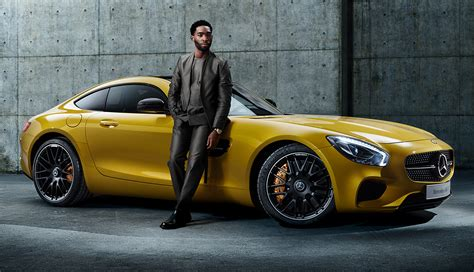

In [12]:
cv2_imshow(img)

In [13]:
# Showing information on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

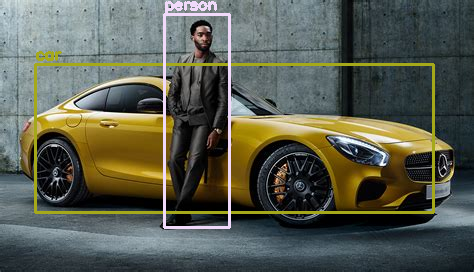

-1

In [14]:
# We use NMS function in opencv to perform Non-maximum Suppression
# we give it score threshold and nms threshold as arguments.
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
colors = np.random.uniform(0, 255, size=(len(classes), 3))
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
                    1 / 2, color, 2)

cv2_imshow(img)
cv2.waitKey(0)
